In [1]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
from camera import Camera
from read_form_obj import read_from_obj
from render_triangle import to_homogeneous, rasterize_triangle, show_image

In [2]:
vertices, faces = read_from_obj("/home/user1/PycharmProjects/renderer/bench/model.obj")

In [3]:
camera_position = np.array([-1, -2, 3])
at = np.array([0, 0, 0])
up = np.array([0, -1, 0])
fov = 90
z_near = 0.1
z_far = 100

In [5]:
camera = Camera(camera_position, at, up, fov, z_near, z_far)
vertices = vertices - np.mean(vertices)
vertices_homogeneous = to_homogeneous(vertices)
projected_vertices = camera(vertices_homogeneous)
colors = np.array([1., 1., 1.,])
canvas = np.zeros(shape=(256, 256, 3))
z_buffer = np.zeros(shape=(256, 256, 3))
z_buffer.fill(-float("inf"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


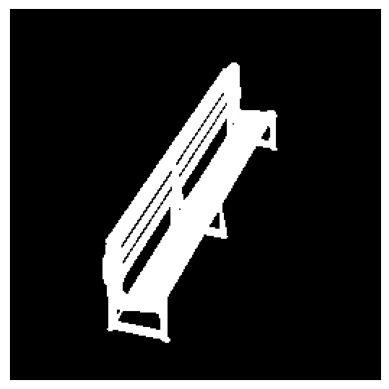

In [8]:
for face in faces:
    to_rasterizer = projected_vertices[face] * 100
    canvas, z_buffer = rasterize_triangle(to_rasterizer, colors=colors, canvas=canvas, z_buffer=z_buffer)
show_image(canvas)